# <center> Assignment 2 – Neural Networks using Python
# <center> Submitted By: Haridas Das

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Install the python version
#!apt-get install python3.7

# Select the version
#!python3.7 setup.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.15-1+bionic1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [25]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
!git clone https://github.com/argonne-lcf/ai-science-training-series.git
%cd ai-science-training-series/02_neural_networks_python/

Cloning into 'ai-science-training-series'...
remote: Enumerating objects: 2282, done.
remote: Total 2282 (delta 0), reused 0 (delta 0), pack-reused 2282
Receiving objects: 100% (2282/2282), 222.42 MiB | 37.39 MiB/s, done.
Resolving deltas: 100% (1119/1119), done.
Checking out files: 100% (272/272), done.
/content/ai-science-training-series/02_neural_networks_python/ai-science-training-series/02_neural_networks_python/ai-science-training-series/02_neural_networks_python


In [27]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# EDIT: splitting training data into train and val because this is better practice than using test data to
# choose models/hyperparameters
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

x_train = x_train.astype(numpy.float32)
# EDIT: adding pre-processing to validation data 
x_val  = x_val.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_val  /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_val = x_val.reshape(x_val.shape[0], numpy.prod(x_val[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_val  = y_val.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'val:',len(x_val), 'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

(40200, 28, 28)
(40200, 784)

MNIST data loaded: train: 40200 val: 19800 test: 10000
X_train: (40200, 784)
y_train: (40200,)


In [30]:
# to bring the directory 
#!pip install git+https://github.com/cs231n/cs231n.github.io

In [31]:
#!git clone https://github.com/cs231n/cs231n.github.io

In [28]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license
from fc_net import TwoLayerNet

In [29]:
!pip install TwoLayerNet
# first we need to define TwoLayerNet, then clone the 02_neural_networks_python/ 
# then !pip install  fc_net

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement TwoLayerNet (from versions: none)
ERROR: No matching distribution found for TwoLayerNet


In [31]:
!git clone https://github.com/argonne-lcf/ai-science-training-series.git
%cd ai-science-training-series/02_neural_networks_python/

Cloning into 'ai-science-training-series'...
remote: Enumerating objects: 2282, done.
remote: Total 2282 (delta 0), reused 0 (delta 0), pack-reused 2282
Receiving objects: 100% (2282/2282), 222.42 MiB | 38.58 MiB/s, done.
Resolving deltas: 100% (1119/1119), done.
Checking out files: 100% (272/272), done.
/content/ai-science-training-series/02_neural_networks_python/ai-science-training-series/02_neural_networks_python/ai-science-training-series/02_neural_networks_python/ai-science-training-series/02_neural_networks_python


In [ ]:
#conda create -n cs231n python=3.7 


In [32]:
!pip install  fc_net

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement fc_net (from versions: none)
ERROR: No matching distribution found for fc_net


In [33]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights

In [34]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    sgd(model, gradients, learning_rate)
    return loss

In [35]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    # EDIT: squeezing true_values from 2d to 1d speeds up this function
    true_values_1d = numpy.squeeze(true_values)
    acc = (true_values_1d == predictions).sum() / N
    return acc

In [36]:
# EDIT: decided to track how long each epoch takes
import time

In [37]:
# Here's an example training loop using this two-layer model. Can you do better? 

# EDIT: also track validation data
# EDIT: factoring this out into a function to make it easier to compare options
def training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot):
    num_features = x_train.shape[1] # this is the number of pixels
    nb_classes = y_train_onehot.shape[1]
    
    # The weights are initialized from a normal distribution with standard deviation weight_scale
    model = TwoLayerNet(input_dim=num_features, hidden_dim=hidden_dim, num_classes=nb_classes, weight_scale=weight_scale)
    
    num_examples_train = x_train.shape[0]
    num_batches_train = int(num_examples_train / batch_size)
    
    losses = numpy.zeros((num_batches_train*num_epochs,2)) # 1st column for training data, 2nd for validation data
    # EDIT: also track accuracy
    accuracies = numpy.zeros((num_batches_train*num_epochs,2)) 
    
    indices_train = numpy.arange(num_examples_train)
    num_examples_val = x_val.shape[0]
    indices_val = numpy.arange(num_examples_val)

    i = 0
    for epoch in range(0, num_epochs):
        start_epoch = time.time()
        # in each epoch, we loop over all of the training examples
        for step in range(0, num_batches_train):
            # grabbing the next training batch
            offset_train = step * batch_size
            batch_range_train = range(offset_train, offset_train+batch_size)
            x_train_batch = x_train[batch_range_train, :]
            # EDIT: keep around non-onehot labels as well for accuracy calculation
            y_train_onehot_batch = y_train_onehot[batch_range_train,:]
            y_train_batch = y_train[batch_range_train,numpy.newaxis]

            # one approach: grab a random validation batch (random offset into number of validation examples)
            offset_val = numpy.random.randint(low=0, high=num_examples_val-batch_size)
            batch_range_val = range(offset_val, offset_val+batch_size)
            x_val_batch = x_val[batch_range_val, :]
            y_val_onehot_batch = y_val_onehot[batch_range_val,:]
            y_val_batch = y_val[batch_range_val,numpy.newaxis]

            # feed the next batch in to do one sgd step
            loss_train = learn(model, x_train_batch, y_train_onehot_batch, learning_rate)

            # check training & validation loss & accuracy
            losses[i,0] = loss_train
            
            # could save time by commenting out the next three lines and only tracking at the epoch level
            accuracies[i,0] = accuracy(model, x_train_batch, y_train_batch)
            losses[i,1], _ = model.loss(x_val_batch, y_val_onehot_batch)
            accuracies[i,1] = accuracy(model, x_val_batch, y_val_batch)
            i += 1

        # slower, so we're only doing this once per epoch: checking accuracy on all of the data at once
        acc_train = accuracy(model, x_train, y_train)
        acc_val = accuracy(model, x_val, y_val)
        
        # reshuffle the data so that we get a new set of batches
        numpy.random.shuffle(indices_train)
        x_train = x_train[indices_train,:]
        y_train = y_train[indices_train] # keep this shuffled the same way for use in accuracy calculation
        y_train_onehot = y_train_onehot[indices_train,:]

        numpy.random.shuffle(indices_val)
        x_val = x_val[indices_val,:]
        y_val = y_val[indices_val] 
        y_val_onehot = y_val_onehot[indices_val,:]
        end_epoch = time.time()
        time_this_epoch = end_epoch - start_epoch
        print("epoch %d took %.1f seconds, training loss %.5f (last batch), training accuracy %.3f, validation accuracy %.3f" % (epoch, time_this_epoch, loss_train, acc_train, acc_val))
    return losses, accuracies, model

        

epoch 0 took 7.1 seconds, training loss 2.30249 (last batch), training accuracy 0.096, validation accuracy 0.098
epoch 1 took 8.2 seconds, training loss 2.30139 (last batch), training accuracy 0.116, validation accuracy 0.119
epoch 2 took 7.7 seconds, training loss 2.30041 (last batch), training accuracy 0.141, validation accuracy 0.146
epoch 3 took 7.0 seconds, training loss 2.29924 (last batch), training accuracy 0.170, validation accuracy 0.174
epoch 4 took 7.1 seconds, training loss 2.29822 (last batch), training accuracy 0.203, validation accuracy 0.206
epoch 5 took 6.9 seconds, training loss 2.29707 (last batch), training accuracy 0.239, validation accuracy 0.243
epoch 6 took 10.2 seconds, training loss 2.29602 (last batch), training accuracy 0.276, validation accuracy 0.279
epoch 7 took 9.9 seconds, training loss 2.29487 (last batch), training accuracy 0.314, validation accuracy 0.314
epoch 8 took 8.3 seconds, training loss 2.29384 (last batch), training accuracy 0.349, validati

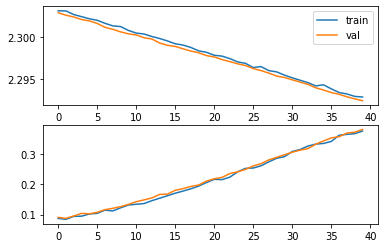

In [38]:
# these are the hyperparameters we had in class
learning_rate = 0.01  
batch_size = 10000
num_epochs = 10
hidden_dim = 300
weight_scale = .01
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

# EDIT: plot training & val, loss & accuracy
plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

# Homework: improve the accuracy of this model. 

Update this notebook so that the accuracy is improved. How high can you get it? You could change things directly in the notebook, such as increasing the number of epochs, changing the learning weight, changing the width of the hidden layer, etc. If you're more ambitious, you could also try changing the model definition itself by checking out the associated Python files. For example, you could add more layers to the network. The current notebook has a training accuracy of about 43%, but will vary with randomness.

0.03210479558034334
epoch 0 took 34.8 seconds, training loss 0.69968 (last batch), training accuracy 0.846, validation accuracy 0.846
epoch 1 took 33.0 seconds, training loss 0.52459 (last batch), training accuracy 0.877, validation accuracy 0.875
epoch 2 took 34.0 seconds, training loss 0.41054 (last batch), training accuracy 0.889, validation accuracy 0.891
epoch 3 took 34.1 seconds, training loss 0.37489 (last batch), training accuracy 0.897, validation accuracy 0.899
epoch 4 took 33.2 seconds, training loss 0.34379 (last batch), training accuracy 0.902, validation accuracy 0.905
epoch 5 took 34.6 seconds, training loss 0.35472 (last batch), training accuracy 0.907, validation accuracy 0.909
epoch 6 took 34.1 seconds, training loss 0.36928 (last batch), training accuracy 0.910, validation accuracy 0.912
epoch 7 took 33.6 seconds, training loss 0.31624 (last batch), training accuracy 0.913, validation accuracy 0.914
epoch 8 took 34.2 seconds, training loss 0.27110 (last batch), train

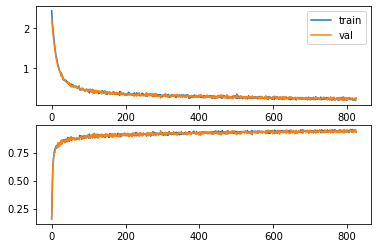

In [40]:
# Here's an example network that is much more accurate. I experimented with each hyperparameter one at a time
# The training took about 11 seconds per epoch on my laptop, and the final validation accuracy was 94%
# It's much slower on ThetaGPU's single-gpu queue, since it doesn't take advantage of a GPU and is stuck using
# a portion of one of the node's CPUs. 
# (With some effort, you can convert everything to CuPy instead of NumPy and then it runs on the GPU)
# If you don't have your own computer to run on, you might want to use Google Colab. 
learning_rate = 0.1  
batch_size = 1200
num_epochs = 25
hidden_dim = 1600
# Try Xavier initialization, although need to use same scaling for both layers, so averaging
# https://keras.io/api/layers/initializers/
size_input = x_train.shape[1]
weight_scale1 = numpy.sqrt(2./(size_input+hidden_dim))
weight_scale2 = numpy.sqrt(2./(hidden_dim+nb_classes))
weight_scale = (weight_scale1 + weight_scale2)/2
print(weight_scale)
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

0.03210479558034334
epoch 0 took 40.9 seconds, training loss 0.64963 (last batch), training accuracy 0.855, validation accuracy 0.853
epoch 1 took 39.3 seconds, training loss 0.48115 (last batch), training accuracy 0.884, validation accuracy 0.885
epoch 2 took 39.7 seconds, training loss 0.45350 (last batch), training accuracy 0.894, validation accuracy 0.897
epoch 3 took 38.5 seconds, training loss 0.35642 (last batch), training accuracy 0.902, validation accuracy 0.904
epoch 4 took 35.3 seconds, training loss 0.34383 (last batch), training accuracy 0.906, validation accuracy 0.909
epoch 5 took 37.7 seconds, training loss 0.34956 (last batch), training accuracy 0.910, validation accuracy 0.913
epoch 6 took 37.0 seconds, training loss 0.37133 (last batch), training accuracy 0.914, validation accuracy 0.916
epoch 7 took 32.8 seconds, training loss 0.28671 (last batch), training accuracy 0.918, validation accuracy 0.919
epoch 8 took 33.8 seconds, training loss 0.26246 (last batch), train

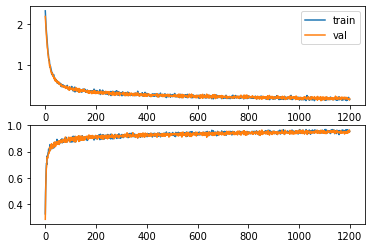

In [43]:

learning_rate = 0.1  
batch_size = 1000
num_epochs = 30
hidden_dim = 1600
# Try Xavier initialization, although need to use same scaling for both layers, so averaging
# https://keras.io/api/layers/initializers/
size_input = x_train.shape[1]
weight_scale1 = numpy.sqrt(2./(size_input+hidden_dim))
weight_scale2 = numpy.sqrt(2./(hidden_dim+nb_classes))
weight_scale = (weight_scale1 + weight_scale2)/2
print(weight_scale)
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

# Comment: 

Using the Google Colab and the following hyperparameters (learning_rate = 0.1, batch_size = 1000
num_epochs = 30, hidden_dim = 1600) final training accuracy 0.952 and validation accuracy 94.9%.

0.03210479558034334
epoch 0 took 35.8 seconds, training loss 1.87101 (last batch), training accuracy 0.613, validation accuracy 0.612
epoch 1 took 34.6 seconds, training loss 1.53619 (last batch), training accuracy 0.741, validation accuracy 0.735
epoch 2 took 35.6 seconds, training loss 1.26738 (last batch), training accuracy 0.783, validation accuracy 0.781
epoch 3 took 35.4 seconds, training loss 1.06739 (last batch), training accuracy 0.806, validation accuracy 0.804
epoch 4 took 34.2 seconds, training loss 0.97795 (last batch), training accuracy 0.820, validation accuracy 0.817
epoch 5 took 35.4 seconds, training loss 0.85244 (last batch), training accuracy 0.831, validation accuracy 0.828
epoch 6 took 35.3 seconds, training loss 0.77938 (last batch), training accuracy 0.839, validation accuracy 0.837
epoch 7 took 34.0 seconds, training loss 0.75980 (last batch), training accuracy 0.846, validation accuracy 0.844
epoch 8 took 35.4 seconds, training loss 0.70630 (last batch), train

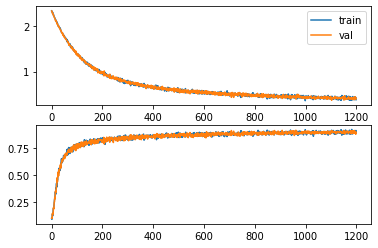

In [41]:
learning_rate = 0.01  
batch_size = 1000
num_epochs = 30
hidden_dim = 1600
# Try Xavier initialization, although need to use same scaling for both layers, so averaging
# https://keras.io/api/layers/initializers/
size_input = x_train.shape[1]
weight_scale1 = numpy.sqrt(2./(size_input+hidden_dim))
weight_scale2 = numpy.sqrt(2./(hidden_dim+nb_classes))
weight_scale = (weight_scale1 + weight_scale2)/2
print(weight_scale)
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

# Comment: 

Using the Google Colab and the following hyperparameters (learning_rate = 0.01, batch_size = 1000
num_epochs = 30, hidden_dim = 1600) final training accuracy is 89.4%, and the validation accuracy is 89.5%

0.03210479558034334
epoch 0 took 36.0 seconds, training loss 2.28211 (last batch), training accuracy 0.149, validation accuracy 0.151
epoch 1 took 34.2 seconds, training loss 2.23592 (last batch), training accuracy 0.220, validation accuracy 0.220
epoch 2 took 34.6 seconds, training loss 2.16816 (last batch), training accuracy 0.312, validation accuracy 0.311
epoch 3 took 34.7 seconds, training loss 2.12494 (last batch), training accuracy 0.395, validation accuracy 0.397
epoch 4 took 33.5 seconds, training loss 2.05825 (last batch), training accuracy 0.465, validation accuracy 0.467
epoch 5 took 34.6 seconds, training loss 2.02490 (last batch), training accuracy 0.519, validation accuracy 0.518
epoch 6 took 33.2 seconds, training loss 1.98461 (last batch), training accuracy 0.560, validation accuracy 0.558
epoch 7 took 34.6 seconds, training loss 1.94473 (last batch), training accuracy 0.591, validation accuracy 0.589
epoch 8 took 34.3 seconds, training loss 1.90029 (last batch), train

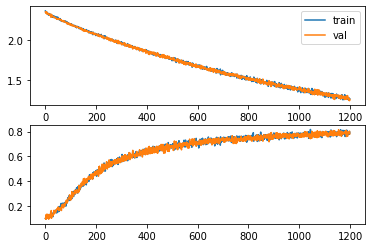

In [39]:
# Here's an example network that is much more accurate. I experimented with each hyperparameter one at a time
# The training took about 11 seconds per epoch on my laptop, and the final validation accuracy was 94%
# It's much slower on ThetaGPU's single-gpu queue, since it doesn't take advantage of a GPU and is stuck using
# a portion of one of the node's CPUs. 
# (With some effort, you can convert everything to CuPy instead of NumPy and then it runs on the GPU)
# If you don't have your own computer to run on, you might want to use Google Colab. 
learning_rate = 0.001  
batch_size = 1000
num_epochs = 30
hidden_dim = 1600
# Try Xavier initialization, although need to use same scaling for both layers, so averaging
# https://keras.io/api/layers/initializers/
size_input = x_train.shape[1]
weight_scale1 = numpy.sqrt(2./(size_input+hidden_dim))
weight_scale2 = numpy.sqrt(2./(hidden_dim+nb_classes))
weight_scale = (weight_scale1 + weight_scale2)/2
print(weight_scale)
losses, accuracies, model = training(learning_rate, batch_size, num_epochs, hidden_dim, weight_scale, x_train, y_train, y_train_onehot, x_val, y_val, y_val_onehot)

plt.figure()
plt.subplot(2,1,1)
plt.plot(losses[:,0])
plt.plot(losses[:,1])
plt.legend(["train", "val"])

plt.subplot(2,1,2)
plt.plot(accuracies[:,0])
plt.plot(accuracies[:,1])

# Comment: 

Using the Google Colab and the following hyperparameters (learning_rate = 0.01, batch_size = 1000
num_epochs = 30, hidden_dim = 1600) final training accuracy is 78.8%, and the validation accuracy is 78.7%

# Conclusion: 

We observed that learning_rate = 0.1  gives us good training and validation accuracy compared to the learning rates: 0.1, 0.01, and 0.001. Here we have used batch_size = 1000, num_epochs = 30, and the hidden_dim = 1600. Still, we can imporve the accuracy by changing the hyperparameters batch_size, num_epochs,, and the hidden_dim. 